In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('FuelConsumptionCo2.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]

In [8]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,2.0,4,196,8.5
1,2.4,4,221,9.6
2,1.5,4,136,5.9
3,3.5,6,255,11.1
4,3.5,6,244,10.6
5,3.5,6,230,10.0
6,3.5,6,232,10.1
7,3.7,6,255,11.1
8,3.7,6,267,11.6


In [9]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]

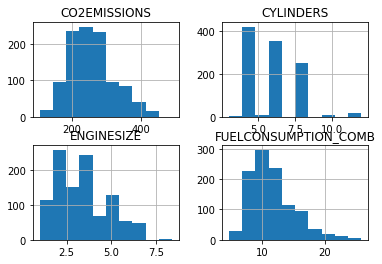

In [10]:
viz.hist()
plt.show()

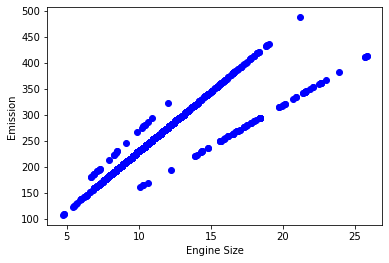

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

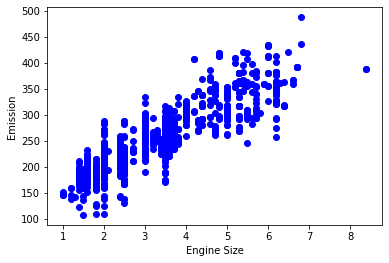

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

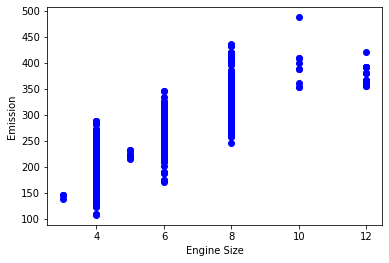

In [13]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

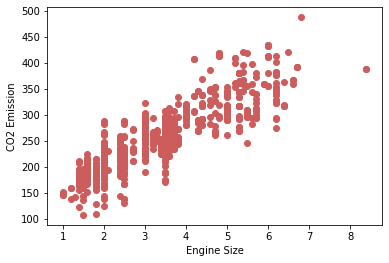

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='indianred')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()

In [16]:
from sklearn import linear_model

In [17]:
regr = linear_model.LinearRegression()

In [19]:
train_x = np.asanyarray(train[['ENGINESIZE']])

In [20]:
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [21]:
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print ('Coefficients : ', regr.coef_)
print ('Intercept : ' , regr.intercept_)

Coefficients :  [[39.21594541]]
Intercept :  [124.6759518]


Text(0, 0.5, 'Emission')

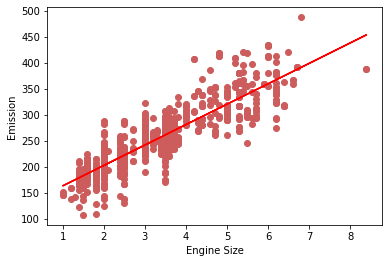

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='indianred')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

In [24]:
from sklearn.metrics import r2_score

In [25]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [26]:
test_y_hat = regr.predict(test_x)

In [27]:
print('Mean Absolute Error : %.2f' %np.mean(np.absolute(test_y_hat - test_y)))

Mean Absolute Error : 22.15


In [28]:
print('Residual sum of squares (MSE) : %.2f' %np.mean((test_y_hat - test_y)**2))

Residual sum of squares (MSE) : 852.34


In [29]:
print ('R2 Score : %.2f' %r2_score(test_y_hat, test_y))

R2 Score : 0.74
